# Optimization (in particular, a focus on SGD) 

Optimization problems exist in many forms. We will make use of a popular technique, Gradient Descent, and a potentially useful extension, under a well-behaved framework of function spaces designed to motivate the use-cases for more complex (and potentially less behaved) function spaces. 


Well behaved: 
1. ($\mathbb{H}:=L_2(\mathbb{R}^n) | \forall f,g \in \mathbb{R}^n, <f,g>  = \int_{\mu}(\bar{f}\bullet g)d\mu$
2.  f,g are square integrable, i.e. $\int\limits_{-\infty}^{\infty} |f(x)|^2 dx <\infty$ ) 
3. f, g are convex, i.e.: $\forall x_1, x_2 \in X, \forall t \in [0, 1]:  f(tx_1+(1-t)x_2)\leq t f(x_1)+(1-t)f(x_2)$

(phew, glad that is over)

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

np.random.seed(1)

%matplotlib inline
np.random.seed(1)

In [71]:
#Parameters (dont look at these yet!)
N = 50
#x = np.random.randn(N,1)*3 +10
x = np.random.rand(N,1)*5
x_plot = np.arange(0,5,step=0.1)
# Let the following command be the true function
#b0 = round(math.exp(1),3) #whats this number? :)
#b1 = round(math.pi, 3) #whats this number? :) 


In [72]:
#True and unknown to us functional relationship between X and Y:
#sigma = 2
y = b0 + b1*x #+ sigma * np.random.randn(N,1)
# Get some noisy observations
y_obs = y + 2*np.random.randn(N,1)

In [73]:
b0

2.718

In [74]:
b1

3.142

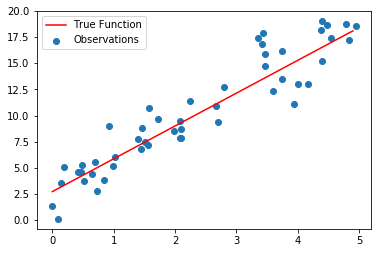

In [75]:
plt.scatter(x,y_obs,label='Observations')
plt.plot(x_plot,b0 + b1*x_plot,c='r', label='True Function')

plt.legend()
plt.show()

In [76]:
N = 100
x = np.random.rand(N,1)*5
# Let the following command be the true function
y = 2.3 + 5.1*x
# Get some noisy observations
y_obs = y + 2*np.random.randn(N,1)

So what do we do? We have to obtain some deravatives (because we want the gardient of the objective function)

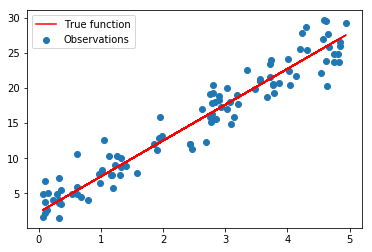

In [77]:
plt.scatter(x,y_obs,label='Observations')
plt.plot(x,y,c='r',label='True function')
plt.legend()
plt.show()

$f$

In [78]:
def f(beta_0,beta_1):
    return beta_0 + beta_1*x

loss function

In [79]:
def loss_function(e):
    S = np.sum(np.square(e))/N
    return S

$\frac{dS}{d\beta_0}$

In [80]:
def dS_db_0(e,b_0,b_1):
    return -2*np.sum(e*df_db_1(b_0,b_1))/N

$\frac{dS}{d\beta_1}$

In [81]:
def dS_db_1(e,b_0,b_1):
    return -2*np.sum(e*df_db_1(b_0,b_1))/N

$\frac{df}{d\beta_0}$

In [82]:
def df_db_0(b_0,b_1):
    return np.ones(x.shape)

$\frac{df}{d\beta_1}$

In [83]:
def df_db_1(b_0,b_1):
    return x

In [100]:
# The Actual Gradient Descent (again borrowed from https://github.com/sachinruk/deepschool.io, and modified for clarity)
def gradient_descent(iter=100,gamma=0.1):
    # get starting conditions
    b1 = .5
    b0 = .5
    params = []
    loss = np.zeros((iter,1))
    for i in range(iter):
#         from IPython.core.debugger import Tracer; Tracer()()
        params.append([b0,b1])
        e = y_obs - f(b0,b1) # Really important that you use y_obs and not y (you do not have access to true y)
        loss[i] = loss_function(e)

        #update parameters
        b0_new = b0 - gamma * dS_db_0(e,b0,b1)
        b1_new = b1 - gamma * dS_db_1(e,b0,b1)
        
        b0 = b0_new
        b1 = b1_new 
        
        
    return params, loss
        
params, loss = gradient_descent()

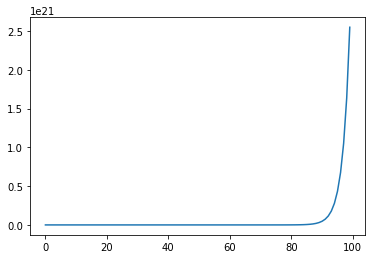

In [101]:
plt.plot(loss)

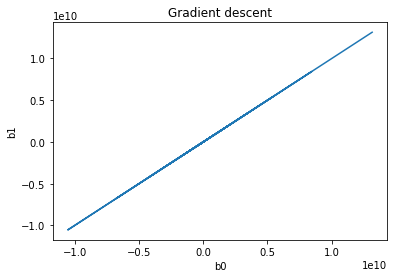

In [102]:
params = np.array(params)
plt.plot(params[:,0],params[:,1])
plt.title('Gradient descent')
plt.xlabel('b0')
plt.ylabel('b1')
plt.show()

In [103]:
params[-1]

array([  1.31434214e+10,   1.31434214e+10])